In [23]:
'''
Explicit Euler for solving the diffusion equation:
u_t = D*u_xx

with boundary conditions:
u(a, t) = alpha = 1

u(b, t) = beta = 0

u(x, 0) = f(x) = 0

a = 0
b = 1

'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from numpy.linalg import solve

# define the problem

# diffusion coefficient
D = 0.5

# domain
a = 0.0
b = 1.0

# boundary conditions
alpha = 1.0
beta = 0.0

# grid for initial condition
f = lambda x: np.zeros(np.size(x))



In [24]:
# creating grid

N = 20
x = np.linspace(a, b, N+1)
x_int = x[1:-1]
dx = (b-a)/N

# CFL number
C = 0.49

# time discretization
dt = C*dx**2/D
t_final = 1
N_time = int(t_final/dt)
t = dt * np.arange(N_time)

# print some info about time step
print('dt = %.3f' % dt)
print('%i time steps will be needed' % N_time)


dt = 0.002
408 time steps will be needed


In [25]:
# start time stepping

# preallocate solution
u = np.zeros((N_time+1, N-1))
u[0,:] = f(x_int)

# loop over the steps
for n in range(0,N_time):

    # loop over the grid
    for i in range(0, N-1):
        if i==0:
            u[n+1,i] = u[n,i] + C*(u[n,i+1]-2*u[n,i]+alpha)
        elif i < 0 and i < N-2:
            u[n+1,i] = u[n,i] + C*(u[n,i+1]-2*u[n,i]+u[n,i-1])
        else:
            u[n+1,i] = u[n,i] + C*(beta-2*u[n,i]+u[n,i-1])



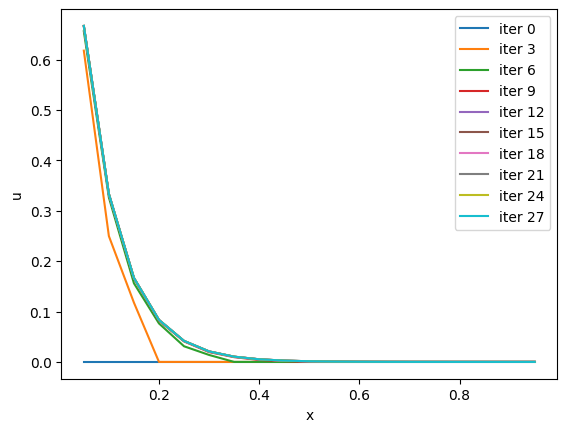

In [26]:
# display the solution
plt.figure()
for i in np.linspace(0, 30, 10, dtype=int, endpoint=False):
    plt.plot(x_int, u[i,:], label='iter %i' % i)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

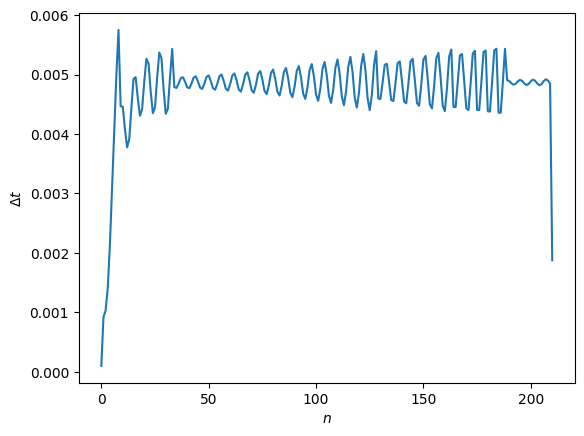

In [27]:
# Using solve_ivp

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# define the problem
a = 0.0
b = 1.0
alpha = 1.0
beta = 0.0
D = 0.5
t_final = 1

# grid for initial condition
f = lambda x: np.zeros(np.size(x))

# creating grid
N = 20
x = np.linspace(a, b, N+1)
x_int = x[1:-1]
dx = (b-a)/N

def PDE(t, u , D, A_DD, b_DD):
    return D / dx**2 * (A_DD @ u + b_DD)

# create the matrix A_DD
A_DD = np.zeros((N-1, N-1))
A_DD[0, 0] = alpha
A_DD[-1, -1] = beta
for i in range(1, N-2):
    A_DD[i, i-1] = 1
    A_DD[i, i] = -2
    A_DD[i, i+1] = 1

# create the vector b_DD
b_DD = np.zeros(N-1)
b_DD[0] = alpha
b_DD[-1] = beta


sol = solve_ivp(PDE, (0, t_final), f(x_int), args=(D, A_DD, b_DD))

# extract the solution
u = sol.y
t = sol.t

# display the solution
plt.figure()
plt.plot(np.diff(t))
plt.xlabel(f'$n$')
plt.ylabel(f'$\Delta t$')
plt.show()

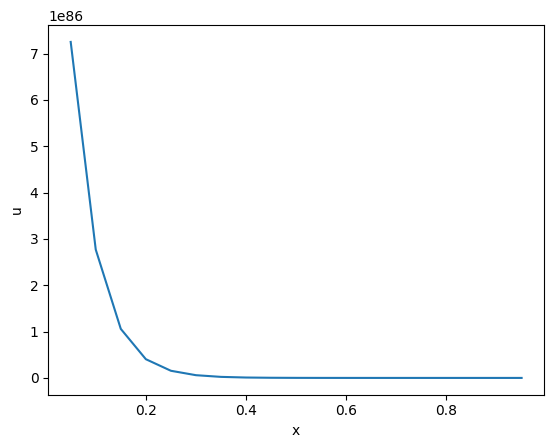

In [28]:
# plot the final solution
plt.figure()
plt.plot(x_int, u[:,-1])
plt.xlabel('x')
plt.ylabel('u')
plt.show()
